In [1039]:
import numpy as np
from numpy import pi

import matplotlib.pyplot as plt

In [1065]:
# Finds the minimum bounding circle for three circles
def mincircle_three(centers, radii, trace=False):
    
    # Check to see if the input contains only one or two circles
    
    if (len(centers) == 1):
        return centers[0]
    
    if (len(centers) == 2):
        return mincircle_two(centers, radii)
    
    # Check if any of the circles fully contains the other two
    
    if (contains(centers[0], radii[0], centers[1], radii[1]) and contains(centers[0], radii[0], centers[2], radii[2])):
        return centers[0], radii[0]
    
    elif (contains(centers[1], radii[1], centers[0], radii[0]) and contains(centers[1], radii[1], centers[2], radii[2])):
        return centers[1], radii[1]
    
    elif (contains(centers[2], radii[2], centers[1], radii[1]) and contains(centers[2], radii[2], centers[0], radii[0])):
        return centers[2], radii[2]
    
    # Check if any of the circles formed by the two circles includes the third circle
    
    c, r = mincircle_two([centers[0], centers[1]], [radii[0], radii[1]])
    
    if (contains(c, r, centers[2], radii[2])): return c, r
    
    c, r = mincircle_two([centers[0], centers[2]], [radii[0], radii[2]])
    
    if (contains(c, r, centers[1], radii[1])): return c, r
    
    c, r = mincircle_two([centers[2], centers[1]], [radii[2], radii[1]])
    
    if (contains(c, r, centers[0], radii[0])): return c, r
    
    
    
    
    cb = sum(centers)/3
    
    rb = max([np.linalg.norm(cb - centers[0]) + radii[0],
              np.linalg.norm(cb - centers[1]) + radii[1],
              np.linalg.norm(cb - centers[2]) + radii[2]])
    
    cb_trace = [cb]
    rb_trace = [rb]
    
    for i in range(10):
        
        v1 = (centers[0] - cb) * (1 + (radii[0] - rb)/np.linalg.norm(centers[0] - cb))
        v2 = (centers[1] - cb) * (1 + (radii[1] - rb)/np.linalg.norm(centers[1] - cb))
        v3 = (centers[2] - cb) * (1 + (radii[2] - rb)/np.linalg.norm(centers[2] - cb))
        
        
        cb = cb + 0.2 * (v1 + v2 + v3)
        rb = max([np.linalg.norm(cb - centers[0]) + radii[0],
                  np.linalg.norm(cb - centers[1]) + radii[1],
                  np.linalg.norm(cb - centers[2]) + radii[2]])
        
        cb_trace.append(cb)
        rb_trace.append(rb)
        
        #print("The circle area is: {}".format(pi * rb**2))
        
    return (cb_trace, rb_trace) if trace else (cb, rb)


# Finds the minimum bounding circle for two circles
def mincircle_two(centers, radii):
    
    rb = (radii[0] + radii[1] + np.linalg.norm(centers[0] - centers[1])) / 2
    
    cb = -1 * (centers[0] - centers[1]) * (rb - radii[0]) / np.linalg.norm(centers[0] - centers[1]) + centers[0]
    
    return cb, rb


# Finds the minimum bounding circle for a set of circles
def mincircle_set(centers, radii):
    
    R_centers = centers[0:3]
    R_radii = radii[0:3]
    
    cb, rb = mincircle_three(R_centers, R_radii)
    
    if (len(centers) == 1):
        
        return centers[0], radii[0]
    
    if (len(centers) == 2):
        
        return mincircle_two(centers, radii)
    
    for k in range(2):
    
        for i in range(0,len(centers)):

            #print("Adding next circle")
            
            if (any(np.array_equal(centers[i], x) for x in R_centers) and any(np.array_equal(radii[i], x) for x in R_radii)):

                continue

            if (contains(cb, rb, centers[i], radii[i])): continue


            c, r = mincircle_three([R_centers[0], R_centers[1], centers[i]], [R_radii[0], R_radii[1], radii[i]])

            if (contains(c, r, R_centers[2], R_radii[2])):

                R_centers = [R_centers[0], R_centers[1], centers[i]]
                R_radii = [R_radii[0], R_radii[1], radii[i]]
                cb = c
                rb = r

                continue


            c, r = mincircle_three([R_centers[0], R_centers[2], centers[i]], [R_radii[0], R_radii[2], radii[i]])

            if (contains(c, r, R_centers[1], R_radii[1])):

                R_centers = [R_centers[0], R_centers[2], centers[i]]
                R_radii = [R_radii[0], R_radii[2], radii[i]]
                cb = c
                rb = r

                continue


            c, r = mincircle_three([R_centers[1], R_centers[2], centers[i]], [R_radii[1], R_radii[2], radii[i]])

            if (contains(c, r, R_centers[0], R_radii[0])):

                R_centers = [R_centers[1], R_centers[2], centers[i]]
                R_radii = [R_radii[1], R_radii[2], radii[i]]
                cb = c
                rb = r

                continue
    
    return cb, rb
    
    
def contains(c1, r1, c2, r2):
    
    return np.linalg.norm(c1 - c2) + r2 <= r1

In [1177]:
def random_circles(num):
    
    centers = []
    radii = []
    
    for i in range(num):
        
        centers.append(np.random.uniform(-30, 30, size=(2,)))
        radii.append(np.random.uniform(1,2))
        
    return centers, radii


In [1042]:
centers = [np.array([2.0, 2.0]), np.array([-2.0, 2.0]), np.array([2.0, -2.0])]
radii = [8.0, 8.0, 1.0]

cb, rb = mincircle_three(centers, radii)
#print(cb)
#print(rb)

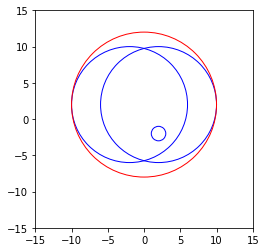

In [1043]:
fig, ax = plt.subplots()

circle1 = plt.Circle(centers[0], radii[0], color='b', fill=False)
circle2 = plt.Circle(centers[1], radii[1], color='b', fill=False)
circle3 = plt.Circle(centers[2], radii[2], color='b', fill=False)

ax.set_aspect( 1 )
ax.set_xlim((-15,15))
ax.set_ylim((-15,15))

ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)

#for c, r in zip(cb, rb):
    
    #circle = plt.Circle(c, r, color='r', fill=False)
    #ax.add_artist(circle)
    
circle = plt.Circle(cb, rb, color='r', fill=False)
ax.add_artist(circle)


plt.show()


In [1046]:
centers = [np.array([2.0, 2.0]), np.array([-2.0, 2.0]), np.array([2.0, -2.0]), np.array([-2.0, -2.0])]
radii = [4.0, 6.0, 1.0, 4.0]

centers, radii = random_circles(15)

cb, rb = mincircle_set(centers, radii)

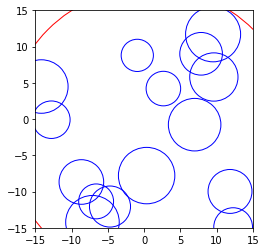

In [1047]:
fig, ax = plt.subplots()

ax.set_aspect( 1 )
ax.set_xlim((-15,15))
ax.set_ylim((-15,15))

for c, r in zip(centers, radii):
    
    circle = plt.Circle(c, r, color='b', fill=False)
    ax.add_artist(circle)
    
circle = plt.Circle(cb, rb, color='r', fill=False)
ax.add_artist(circle)


plt.show()

In [1048]:
# Code to find the minimum bounding circle of a set of points

# Finding the trivial minimum circle for a set of three points
def mincircle_p(p1, p2, p3):
    
    cb, rb = mincircle_p_two(p1, p2)
    
    if (contains_point(p3, cb, rb)):
        
        return cb, rb
    
    
    cb, rb = mincircle_p_two(p1, p3)
    
    if (contains_point(p2, cb, rb)):
        
        return cb, rb
    
    
    cb, rb = mincircle_p_two(p3, p2)
    
    if (contains_point(p1, cb, rb)):
        
        return cb, rb
    
    
    return circumcircle(p1, p2, p3)

def circumcircle(p1, p2, p3):
    
    x1 = p1[0]
    y1 = p1[1]
    
    x2 = p2[0]
    y2 = p2[1]
    
    x3 = p3[0]
    y3 = p3[1]
    
    x12 = x1 - x2
    x13 = x1 - x3
    
    y12 = y1 - y2
    y13 = y1 - y3
    
    y31 = y3 - y1
    y21 = y2 - y1
    
    x31 = x3 - x1
    x21 = x2 - x1
    
    sx13 = x1 ** 2 - x3 ** 2
    sy13 = y1 ** 2 - y3 ** 2
    
    sx21 = x2 ** 2 - x1 ** 2
    sy21 = y2 ** 2 - y1 ** 2
    
    f = -1 * ((sx13) * (x12) + (sy13) * (x12) + (sx21) * (x13) + (sy21) * (x13)) / (2 * ((y31) * (x12) - (y21) * (x13)))
    g = -1 * ((sx13) * (y12) + (sy13) * (y12) + (sx21) * (y13) + (sy21) * (y13)) / (2 * ((x31) * (y12) - (x21) * (y13)))
    
    c = np.array([g, f])
    
    r = np.linalg.norm(p1 - c)
    
    return c, r
    
    

# Finding the trivial minimum circle for a set of two points
def mincircle_p_two(p1, p2):
    
    c = (p1 + p2) / 2
    r = np.linalg.norm(p1 - p2) / 2
    
    return c, r


# Function to check if a circle contains a point
def contains_point(p, c, r):
    
    return np.linalg.norm(p - c) < r


def mincircle_p_set(points, trace = False):
    
    cb, rb = mincircle_p(points[0], points[1], points[2])
    
    R = [points[0], points[1], points[2]]
    
    cb_trace = []
    rb_trace = []
    
    for i in range(2):
    
        for p in points:

            cb_trace.append(cb)
            rb_trace.append(rb)

            if (any(np.array_equal(p, x) for x in R)):

                continue

            if (contains_point(p, cb, rb)):

                continue


            c, r = mincircle_p(R[0], R[1], p)

            if (contains_point(R[2], c, r)):

                R[2] = p
                cb = c
                rb = r

                continue

            c, r = mincircle_p(R[0], p, R[2])

            if (contains_point(R[1], c, r)):

                R[1] = p
                cb = c
                rb = r

                continue

            c, r = mincircle_p(p, R[1], R[2])

            if (contains_point(R[0], c, r)):

                R[0] = p
                cb = c
                rb = r

                continue
    
    cb_trace.append(cb)
    rb_trace.append(rb)
            
    return (cb_trace, rb_trace) if trace else (cb, rb)
    

In [1049]:
def random_points(num):
    
    points = []
    
    for i in range(num):
        
        points.append(np.random.uniform(-7, 7, size=(2,)))
    
    return points

In [1050]:
#points = [np.array([5.0, 5.0]), np.array([-8.0, 0.0]), np.array([-5.0, -5.0]), np.array([-5.0, 5.0])]

points = random_points(30)

#c, r = mincircle_p(points[0], points[1], points[2])

c, r = mincircle_p_set(points, trace=True)

print(c, r)

[array([-0.3276338 , -2.15830807]), array([-0.3276338 , -2.15830807]), array([-0.3276338 , -2.15830807]), array([-0.3276338 , -2.15830807]), array([-0.3276338 , -2.15830807]), array([-0.3276338 , -2.15830807]), array([-0.3276338 , -2.15830807]), array([-0.3276338 , -2.15830807]), array([-0.2709463 , -2.02733507]), array([-0.2709463 , -2.02733507]), array([-0.2709463 , -2.02733507]), array([-0.0926753 , -2.19334501]), array([-0.0926753 , -2.19334501]), array([-0.30098776, -1.53706839]), array([-0.50725736, -1.09225996]), array([-0.50725736, -1.09225996]), array([-0.50725736, -1.09225996]), array([-0.50725736, -1.09225996]), array([-0.50725736, -1.09225996]), array([-0.50725736, -1.09225996]), array([-0.50725736, -1.09225996]), array([-0.50725736, -1.09225996]), array([-0.50725736, -1.09225996]), array([-0.50725736, -1.09225996]), array([-0.50725736, -1.09225996]), array([-0.50725736, -1.09225996]), array([-0.50725736, -1.09225996]), array([-0.50725736, -1.09225996]), array([-0.50725736,

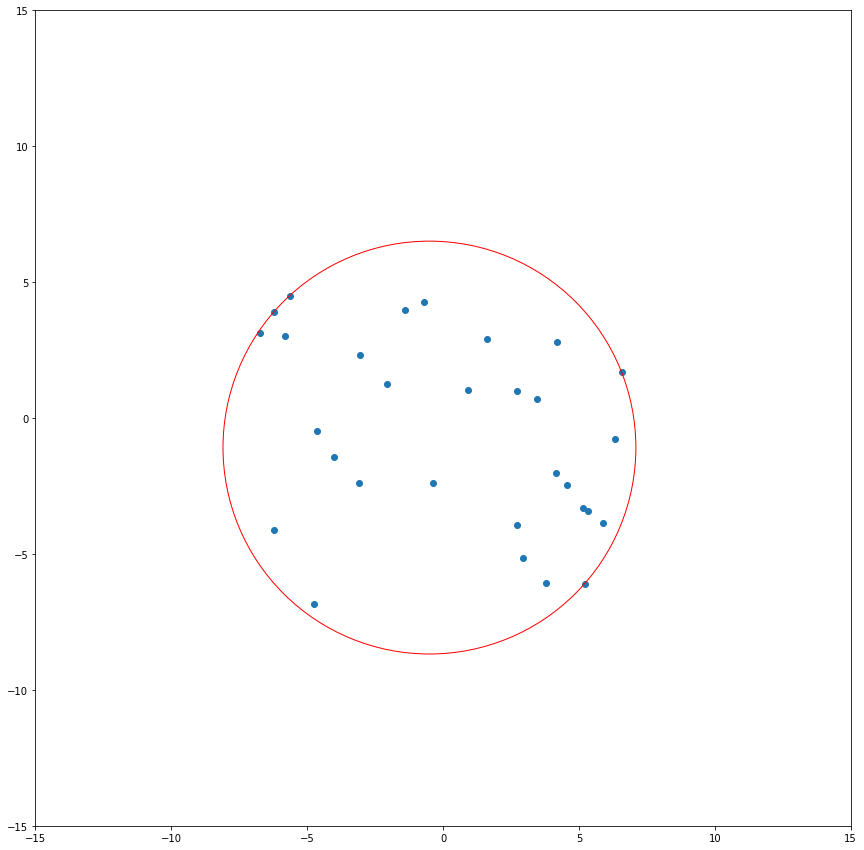

In [1051]:
fig, ax = plt.subplots()

ax.set_aspect( 1 )
ax.set_xlim((-15,15))
ax.set_ylim((-15,15))

fig.set_figheight(15)
fig.set_figwidth(15)

points = np.asarray(points)

plt.scatter(points[:,0], points[:,1])

for cb, rb in zip(c, r):
    
    circle = plt.Circle(cb, rb, color='b', fill=False)
    #ax.add_artist(circle)

circle = plt.Circle(c[-1], r[-1], color='r', fill=False)
ax.add_artist(circle)

plt.show()

In [1052]:
def k_means_clustering(num, points):
    
    centers = []
    buckets = []
    
    for i in range(num):
        
        centers.append(points[np.random.randint(0, len(points))] + np.random.uniform(-0.2, 0.2, size=(2,)))
        buckets.append([])
        
    runs = 25
    
    for i in range(runs):
        
        for p in points:
            
            index = 0
            mindist = np.inf
            
            for j, center in enumerate(centers):
                
                dist = np.linalg.norm(p - center)
                
                if (dist < mindist):
                    
                    index = j
                    mindist = dist
                    
            buckets[index].append(p)
            
        for j, b in enumerate(buckets):
            
            centers[j] = sum(b)/len(b)
            
            buckets[j] = []
            
    return centers

In [1235]:
numpoints = 100

points1, radii1 = random_circles(numpoints)
points2, radii2 = random_circles(numpoints)
points3, radii3 = random_circles(numpoints)

for i in range(numpoints):
    
    points1[i]  = points1[i] + np.array([0.0, 0.0])
    points2[i]  = points2[i] + np.array([0.0, 0.0])
    points3[i]  = points3[i] + np.array([0.0, 0.0])
    
points1.extend(points2)
points1.extend(points3)

radii1.extend(radii2)
radii1.extend(radii3)

centers = k_means_clustering(30, points1)

print(centers)

buckets = []
buckets_r = []

for i in range(len(centers)):
    
    buckets.append([])
    buckets_r.append([])
    
for p, r in zip(points1, radii1):
            
    index = 0
    mindist = np.inf
            
    for j, center in enumerate(centers):
                
        #print(p, center)
        dist = np.linalg.norm(p - center)
                
        if (dist < mindist):
                    
            index = j
            mindist = dist
                    
    buckets[index].append(p)
    buckets_r[index].append(r)
    
cbs = []
rbs = []

for b, b_r in zip(buckets, buckets_r):
    
    c, r = mincircle_set(b, b_r)
    
    cbs.append(c)
    rbs.append(r)

    
    
    
    
centers2 = k_means_clustering(6, cbs)

buckets = []
buckets_r = []

for i in range(len(centers2)):
    
    buckets.append([])
    buckets_r.append([])
    
for p, r in zip(cbs, rbs):
            
    index = 0
    mindist = np.inf
            
    for j, center in enumerate(centers2):
                
        #print(p, center)
        dist = np.linalg.norm(p - center)
                
        if (dist < mindist):
                    
            index = j
            mindist = dist
                    
    buckets[index].append(p)
    buckets_r[index].append(r)
    
cbs2 = []
rbs2 = []

for b, b_r in zip(buckets, buckets_r):
    
    c, r = mincircle_set(b, b_r)
    
    cbs2.append(c)
    rbs2.append(r)
    

[array([24.32556959, -2.62032637]), array([25.26718236, 27.30949133]), array([27.38269756, 17.03603347]), array([19.0733982 ,  7.87525665]), array([-23.25487723,  24.35238827]), array([  1.82744078, -10.29386025]), array([-0.95821678,  8.48026635]), array([ 8.20247612, 12.69129984]), array([-19.40451103, -16.82171948]), array([-9.86853513,  2.62779205]), array([17.88507661, 20.1547929 ]), array([ -7.95863748, -21.29024009]), array([-13.38855078,  20.70762311]), array([-7.63873232, -8.93652496]), array([-1.24873449, -3.03802777]), array([-25.18627532, -23.51106468]), array([ 18.13902915, -24.07312208]), array([11.77715257, -4.83443267]), array([-15.42052881,  -3.23811412]), array([-9.23936211, 12.23209698]), array([-19.2433705 ,   7.23041188]), array([-24.32209872,  -1.79088464]), array([  2.65421184, -21.55210009]), array([-2.90877795, 24.62793516]), array([ 24.34228856, -13.53564898]), array([ 8.38642913, 22.23144024]), array([-26.12863905, -10.09858213]), array([-24.99158675,  13.251

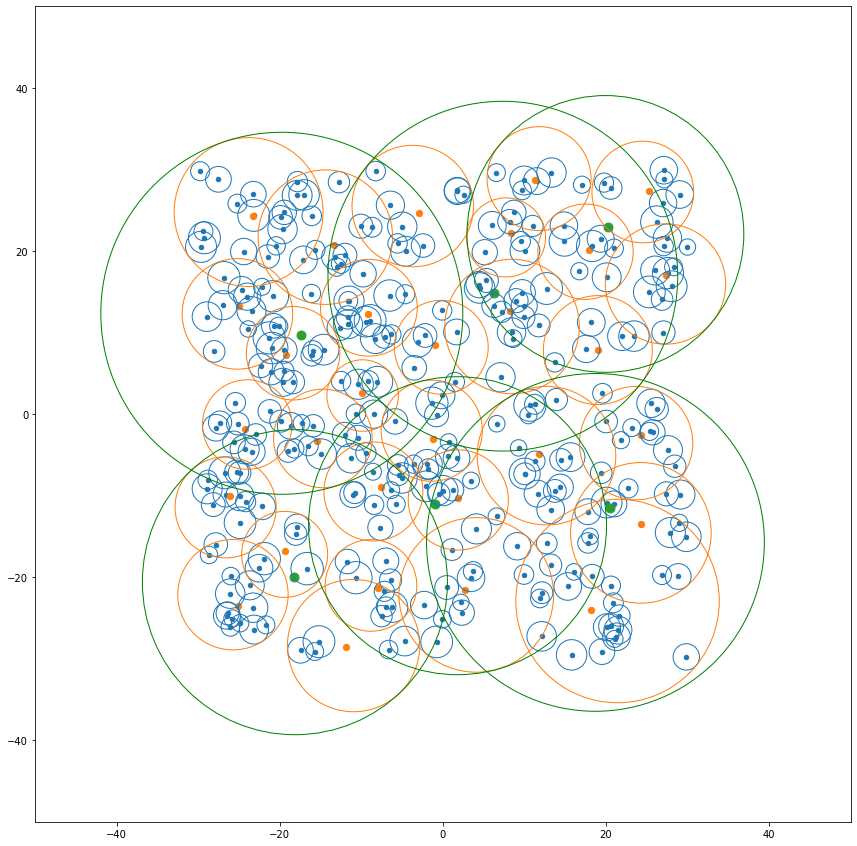

In [1236]:
fig, ax = plt.subplots()

fig.set_figheight(15)
fig.set_figwidth(15)

ax.set_aspect( 1 )
ax.set_xlim((-50,50))
ax.set_ylim((-50,50))

points1 = np.asarray(points1)
centers = np.asarray(centers)
centers2 = np.asarray(centers2)

plt.scatter(points1[:,0], points1[:,1], s = 20)
plt.scatter(centers[:,0], centers[:,1], s = 40)
plt.scatter(centers2[:,0], centers2[:,1], s = 80)

for c, r in zip(points1, radii1):
    
    circle = plt.Circle(c, r, color='tab:blue', fill=False)
    ax.add_artist(circle)
    
for c, r in zip(cbs, rbs):
    
    circle = plt.Circle(c, r, color='tab:orange', fill=False)
    ax.add_artist(circle)
    
for c, r in zip(cbs2, rbs2):
    
    circle = plt.Circle(c, r, color='g', fill=False)
    ax.add_artist(circle)

plt.show()